In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import statsmodels.tsa.stattools as sts

from statsmodels.tsa.api import VAR


In [70]:
# Reading the gdp data sets
df=pd.read_csv("C:\\Users\\nshra\\GDP.csv")
df

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
288,2019-01-01,21098.827
289,2019-04-01,21340.267
290,2019-07-01,21542.540
291,2019-10-01,21729.124


In [71]:
print(np.array(df['DATE']))

['1947-01-01' '1947-04-01' '1947-07-01' '1947-10-01' '1948-01-01'
 '1948-04-01' '1948-07-01' '1948-10-01' '1949-01-01' '1949-04-01'
 '1949-07-01' '1949-10-01' '1950-01-01' '1950-04-01' '1950-07-01'
 '1950-10-01' '1951-01-01' '1951-04-01' '1951-07-01' '1951-10-01'
 '1952-01-01' '1952-04-01' '1952-07-01' '1952-10-01' '1953-01-01'
 '1953-04-01' '1953-07-01' '1953-10-01' '1954-01-01' '1954-04-01'
 '1954-07-01' '1954-10-01' '1955-01-01' '1955-04-01' '1955-07-01'
 '1955-10-01' '1956-01-01' '1956-04-01' '1956-07-01' '1956-10-01'
 '1957-01-01' '1957-04-01' '1957-07-01' '1957-10-01' '1958-01-01'
 '1958-04-01' '1958-07-01' '1958-10-01' '1959-01-01' '1959-04-01'
 '1959-07-01' '1959-10-01' '1960-01-01' '1960-04-01' '1960-07-01'
 '1960-10-01' '1961-01-01' '1961-04-01' '1961-07-01' '1961-10-01'
 '1962-01-01' '1962-04-01' '1962-07-01' '1962-10-01' '1963-01-01'
 '1963-04-01' '1963-07-01' '1963-10-01' '1964-01-01' '1964-04-01'
 '1964-07-01' '1964-10-01' '1965-01-01' '1965-04-01' '1965-07-01'
 '1965-10-

In [72]:
print(df.head())

         DATE      GDP
0  1947-01-01  243.164
1  1947-04-01  245.968
2  1947-07-01  249.585
3  1947-10-01  259.745
4  1948-01-01  265.742


In [73]:
print(df.shape)

(293, 2)


In [74]:
# Convert the "DATE" column to datetime type
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract the year from the "DATE" column
df['year'] = df['DATE'].dt.year

# Group the data by year and calculate the mean GDP for each year
gdp_data = df.groupby(['year'], as_index=False).mean()

# Print the year-wise data
print(gdp_data)

    year          GDP
0   1947    249.61550
1   1948    274.46775
2   1949    272.47525
3   1950    299.82725
4   1951    346.91325
..   ...          ...
69  2016  18715.04050
70  2017  19519.42350
71  2018  20580.22300
72  2019  21427.68950
73  2020  21539.68900

[74 rows x 2 columns]


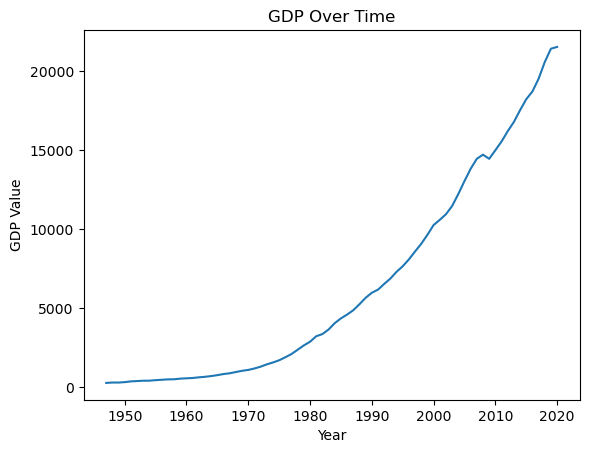

In [75]:
plt.plot(gdp_data['year'],gdp_data['GDP'])
plt.xlabel('Year')
plt.ylabel('GDP Value')
plt.title('GDP Over Time')
plt.show()

In [76]:
# load the "it" data set
it=pd.read_csv("C:\\Users\\nshra\\it.csv")
it


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129081e+10,2.180870e+10,2.370727e+10,2.821034e+10,2.611906e+10,2.968249e+10,...,9.725730e+11,9.834730e+11,1.003770e+12,9.245230e+11,8.827210e+11,1.021120e+12,1.007240e+12,1.001020e+12,9.274840e+11,1.080710e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.412034e+09
265,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540132e+10,4.041523e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN
266,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.041600e+11,3.885320e+11,3.376200e+11,4.190150e+11
267,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10


In [77]:
print(it.head())

                  Country Name Country Code     Indicator Name  \
0                          NaN          NaN                NaN   
1                          NaN          NaN                NaN   
2                          NaN          NaN                NaN   
3                        Aruba          ABW  GDP (current US$)   
4  Africa Eastern and Southern          AFE  GDP (current US$)   

   Indicator Code          1960          1961          1962          1963  \
0             NaN           NaN           NaN           NaN           NaN   
1             NaN           NaN           NaN           NaN           NaN   
2             NaN           NaN           NaN           NaN           NaN   
3  NY.GDP.MKTP.CD           NaN           NaN           NaN           NaN   
4  NY.GDP.MKTP.CD  2.129081e+10  2.180870e+10  2.370727e+10  2.821034e+10   

           1964          1965  ...          2012          2013          2014  \
0           NaN           NaN  ...           NaN           N

In [78]:
print(it.shape)

(269, 66)


In [79]:
# Create a new DataFrame with only the rows for 'United States'
it_us = it[it['Country Name'] == 'United States']

# Select the columns for years and the Indicator Name
it_us = it_us.loc[:, it.columns.str.contains('^[1-2]') | it.columns.str.contains('Indicator Name')]

# Set the 'Indicator Name' as the index
it_us.set_index('Indicator Name', inplace=True)

# Transpose the DataFrame so that the columns are the years and the rows are the Indicator Name
it_us = it_us.T

# Rename the columns
it_us.rename(columns={'High-technology exports (current US$)': 'IT_Exports'}, inplace=True)

# Reset the index to make the years a column again
it_us.reset_index(inplace=True)

# Rename the 'index' column to 'Year'
it_us.rename(columns={'index': 'Year'}, inplace=True)

# Convert the 'Year' column to int
it_us['Year'] = it_us['Year'].astype(int)


In [80]:
print(it_us)

Indicator Name  Year  GDP (current US$)
0               1960       5.433000e+11
1               1961       5.633000e+11
2               1962       6.051000e+11
3               1963       6.386000e+11
4               1964       6.858000e+11
..               ...                ...
57              2017       1.947730e+13
58              2018       2.053310e+13
59              2019       2.138100e+13
60              2020       2.106050e+13
61              2021       2.331510e+13

[62 rows x 2 columns]


In [81]:
x_train=np.array(df['DATE'][0::20])
y_train=np.array(df['GDP'][0::20])
print(x_train)
print(y_train)

['1947-01-01T00:00:00.000000000' '1952-01-01T00:00:00.000000000'
 '1957-01-01T00:00:00.000000000' '1962-01-01T00:00:00.000000000'
 '1967-01-01T00:00:00.000000000' '1972-01-01T00:00:00.000000000'
 '1977-01-01T00:00:00.000000000' '1982-01-01T00:00:00.000000000'
 '1987-01-01T00:00:00.000000000' '1992-01-01T00:00:00.000000000'
 '1997-01-01T00:00:00.000000000' '2002-01-01T00:00:00.000000000'
 '2007-01-01T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '2017-01-01T00:00:00.000000000']
[  243.164   359.82    469.779   594.013   844.17   1230.609  1988.648
  3274.302  4722.156  6363.102  8362.655 10788.952 14208.569 16019.758
 19190.431]


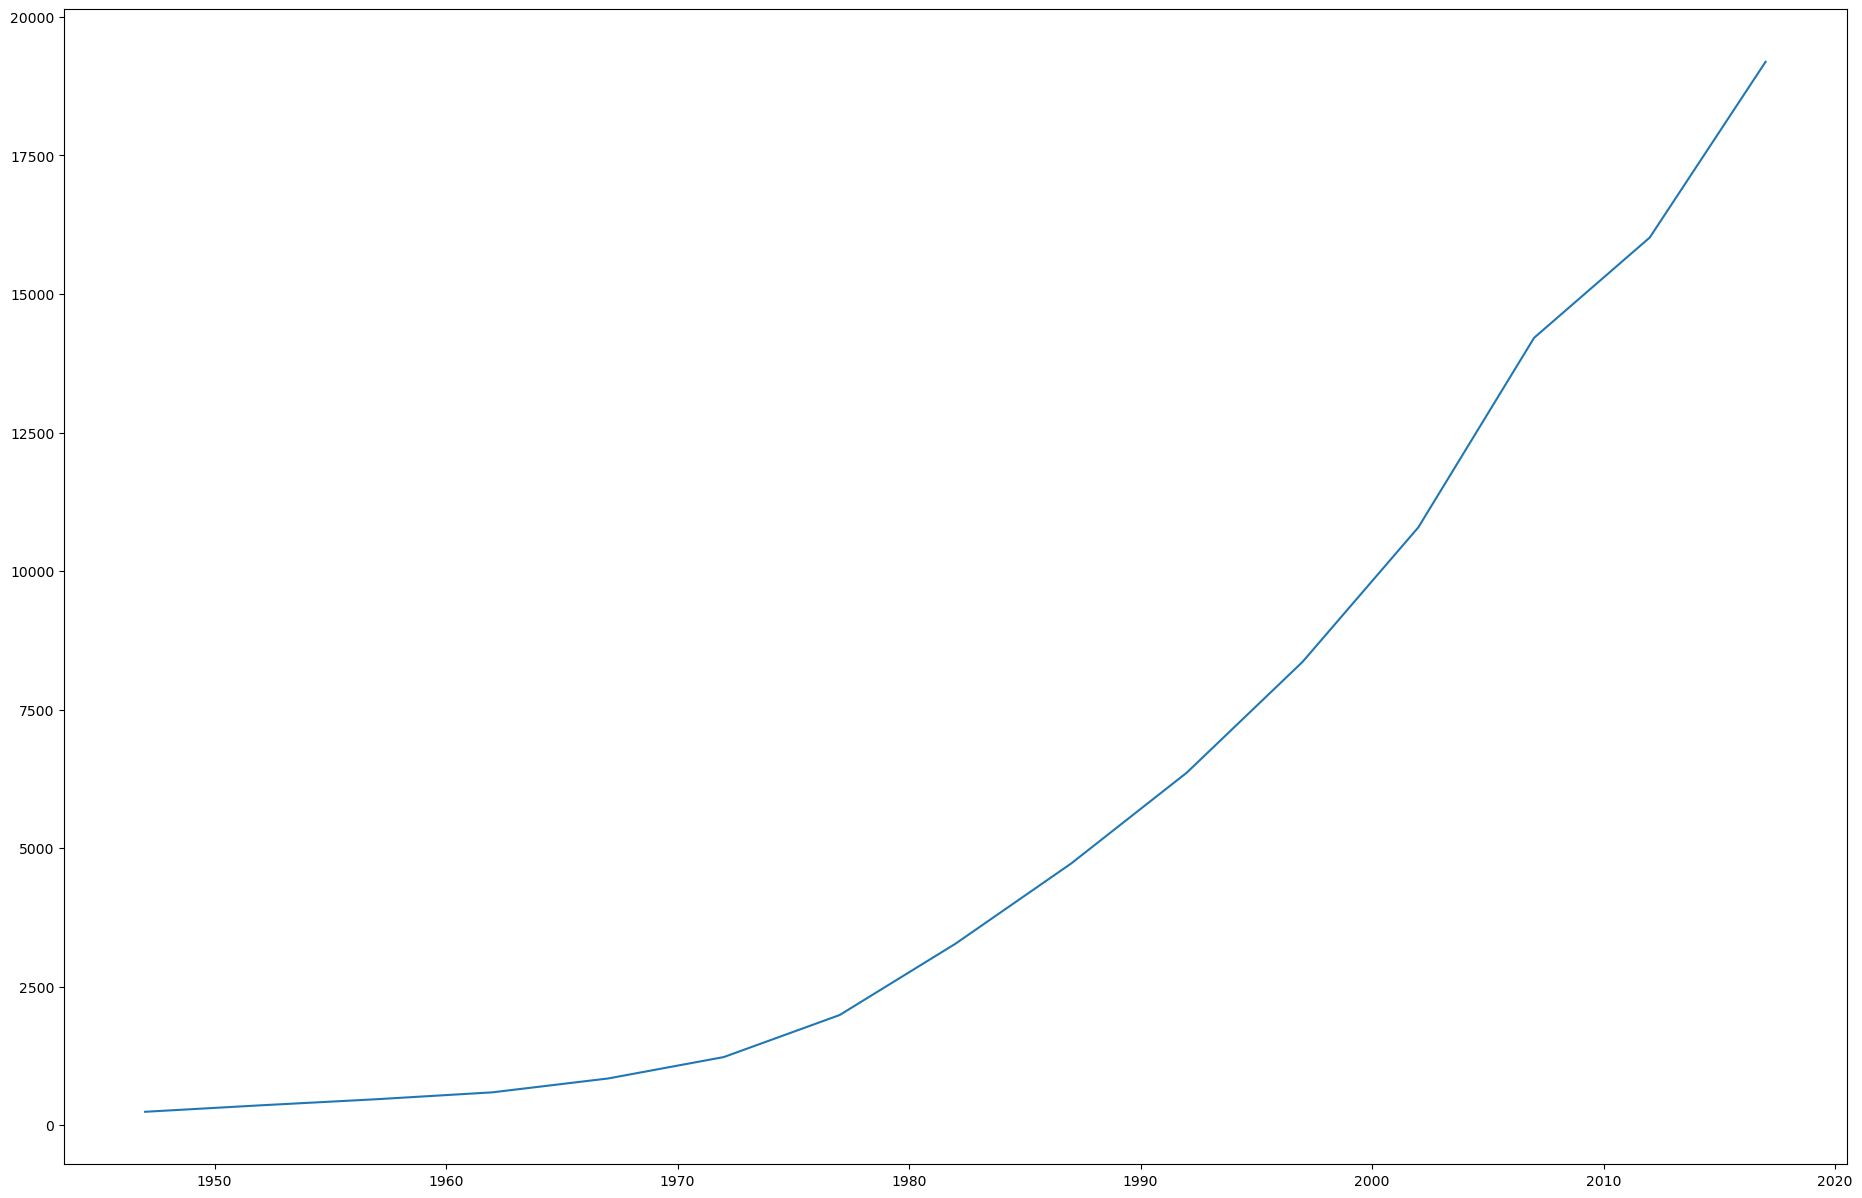

In [82]:
plt.figure(figsize=(23,15))
plt.plot(x_train,y_train)
plt.show()

In [83]:
w=100
b=100

In [84]:
def model(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb
    

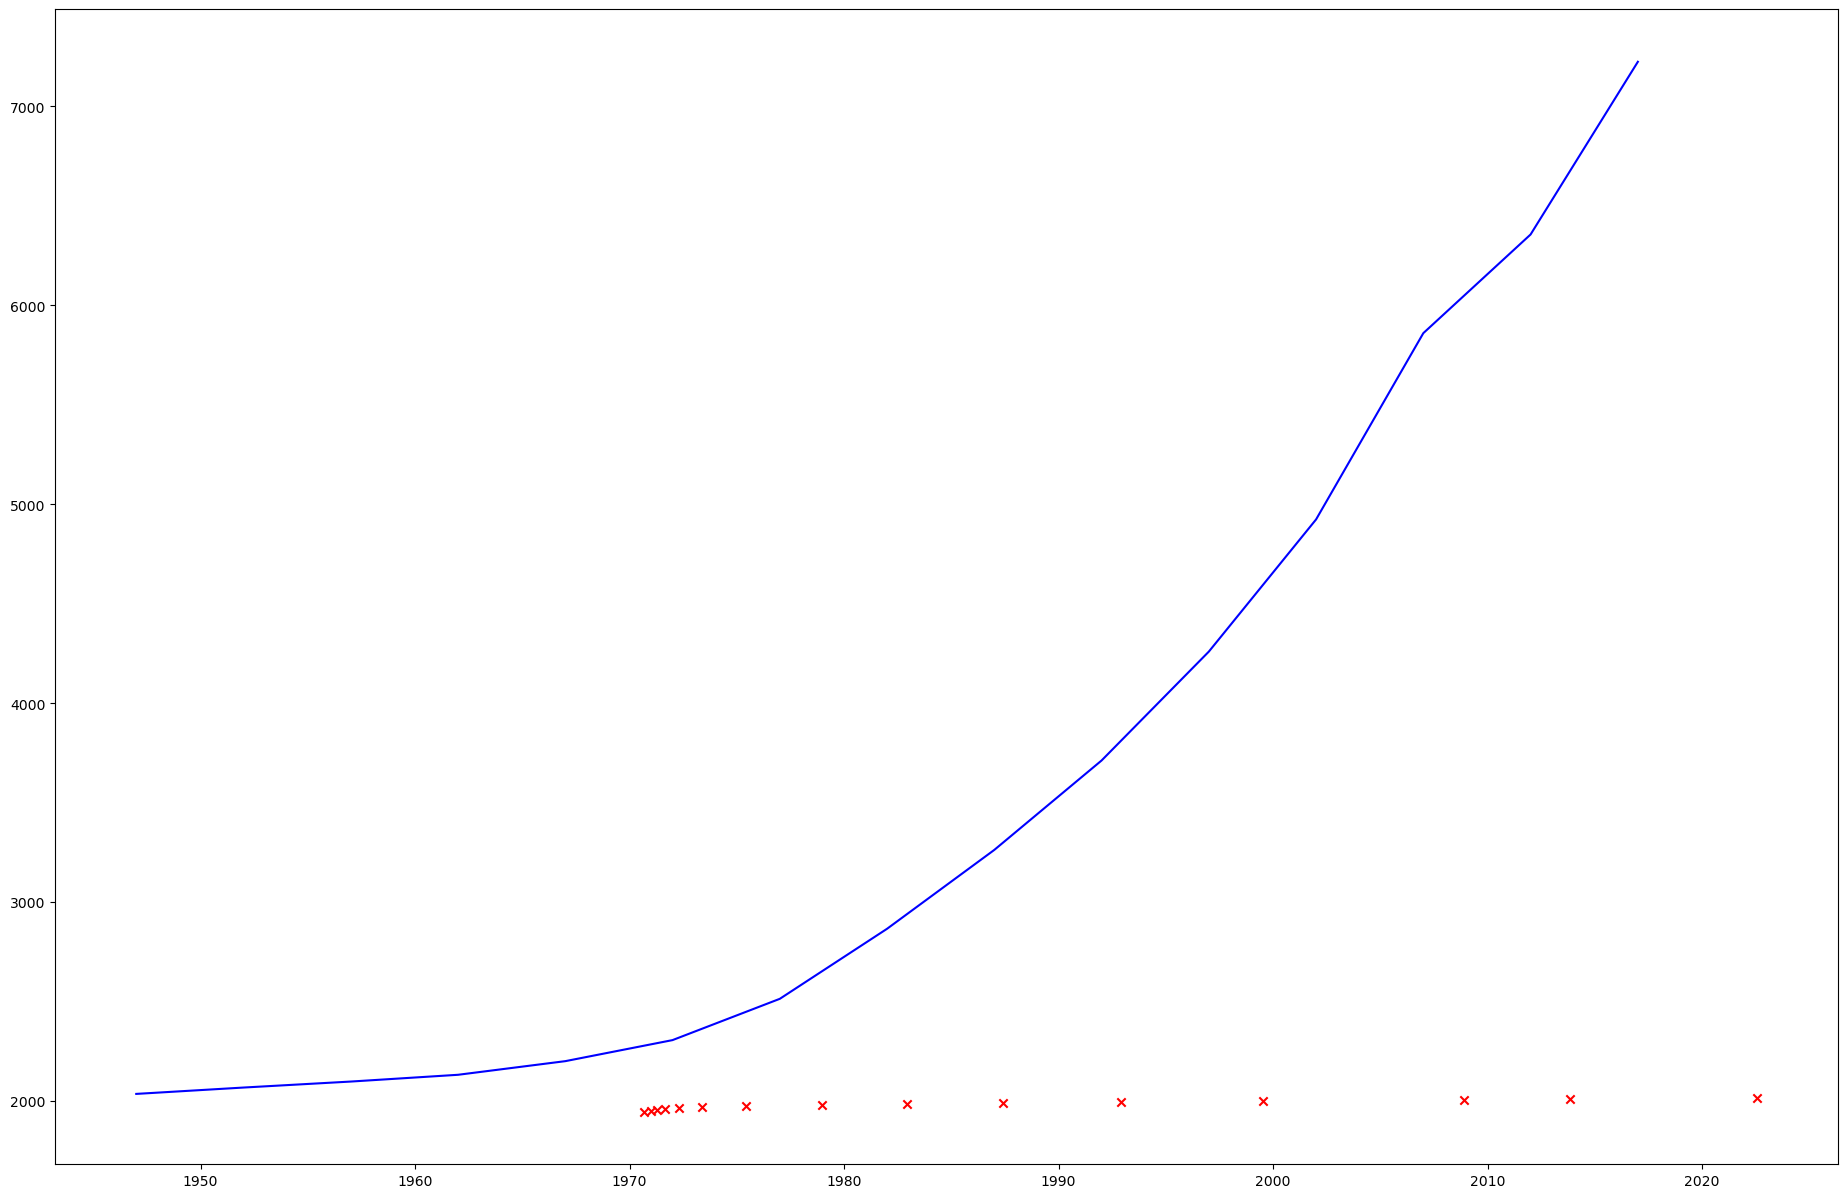

In [85]:
temp_f_wb=model(y_train,w,b)
plt.figure(figsize=(23,15))
plt.plot(x_train,temp_f_wb,c='b',label="Our prediction")
plt.scatter(y_train,x_train,marker='x',c='r',label="Actual values")
plt.show()

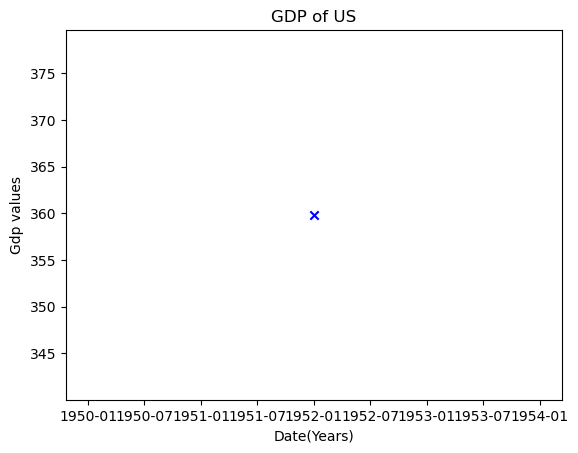

In [86]:
for i in range(1,len(x_train),50):
    x_i=x_train[i]
    y_i=y_train[i]
    plt.scatter(x_i,y_i,marker='x',c='b')
    plt.title("GDP of US")
    plt.xlabel("Date(Years)")
    plt.ylabel("Gdp values")

plt.show()


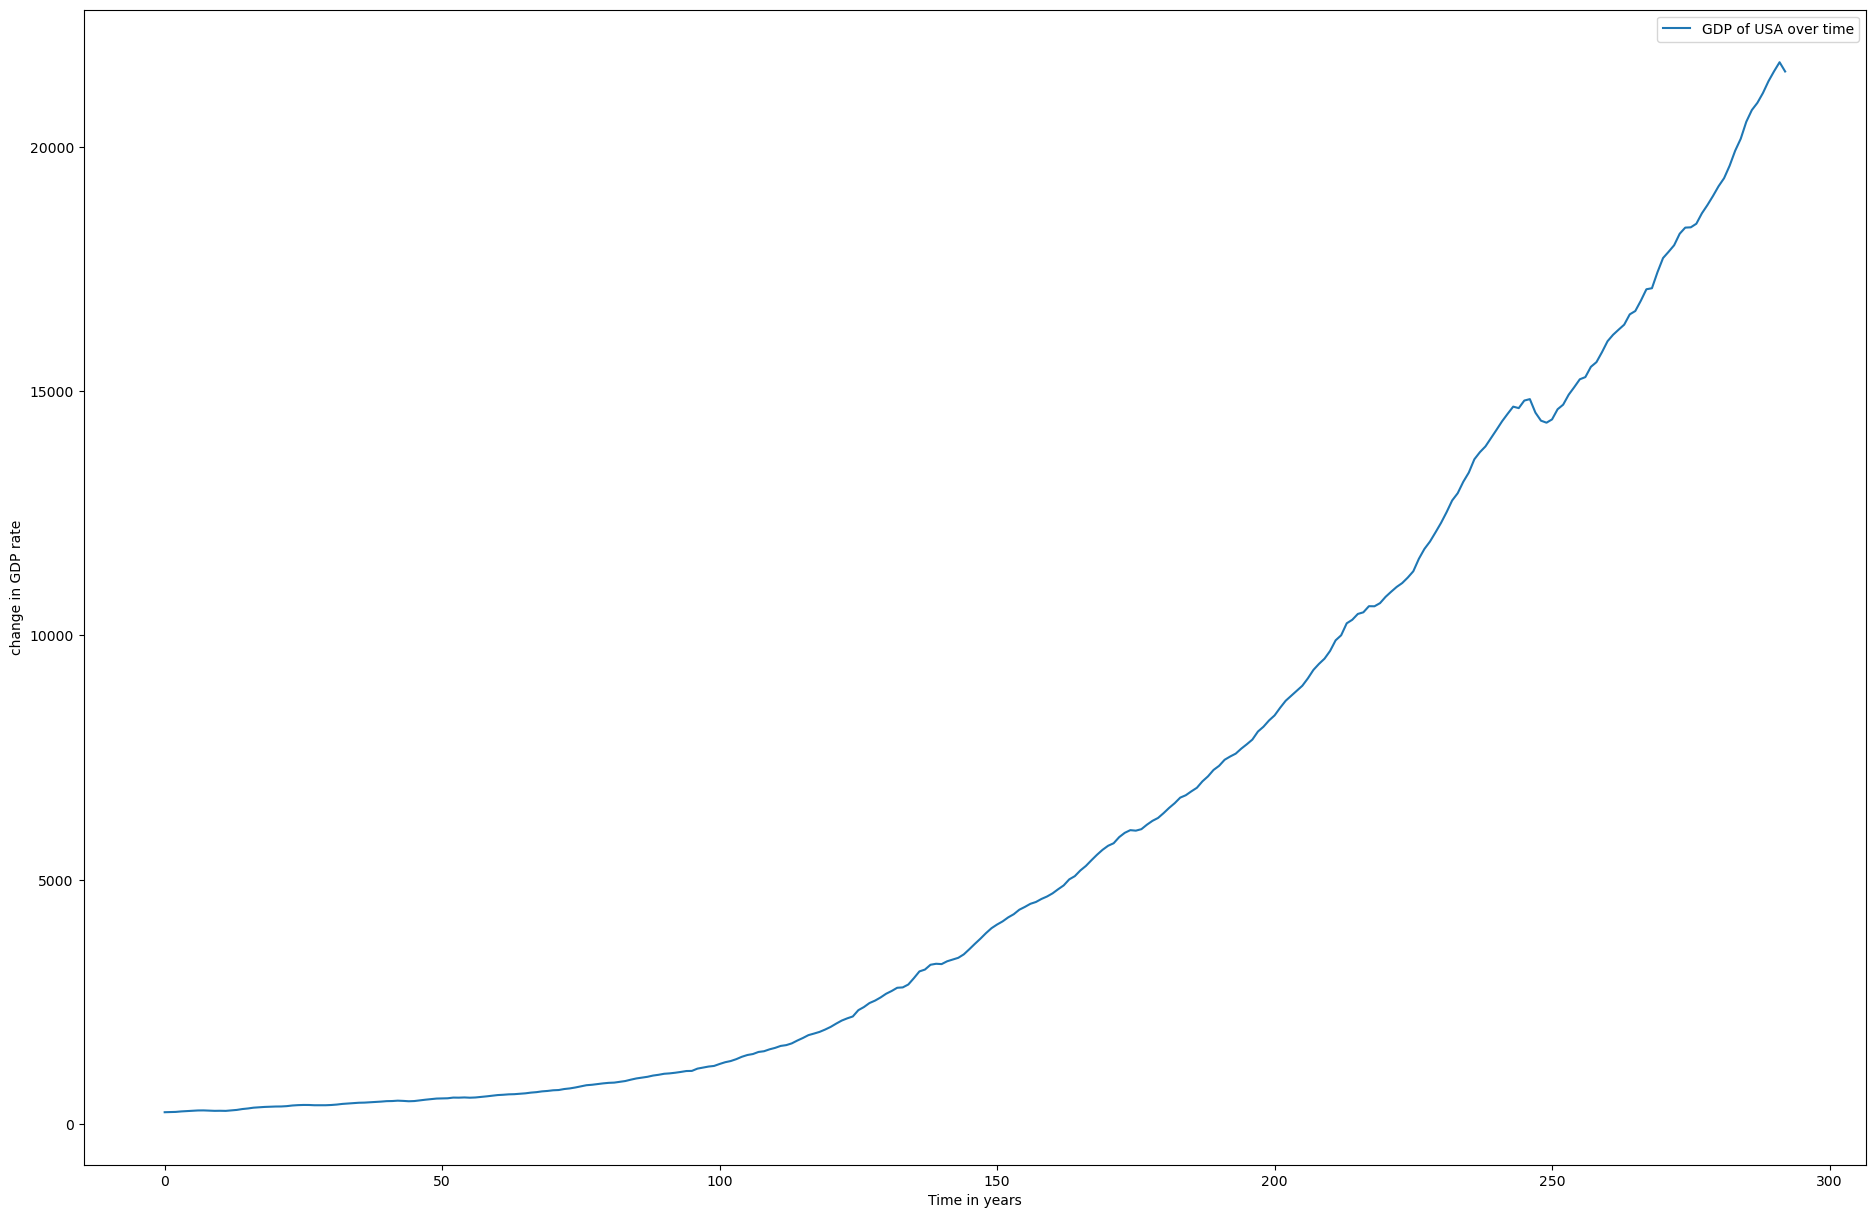

In [87]:
import seaborn as sns
plt.figure(figsize=(23,15))
sns.lineplot(data=df['GDP'],label='GDP of USA over time')
plt.xlabel("Time in years")
plt.ylabel("change in GDP rate")
plt.show()

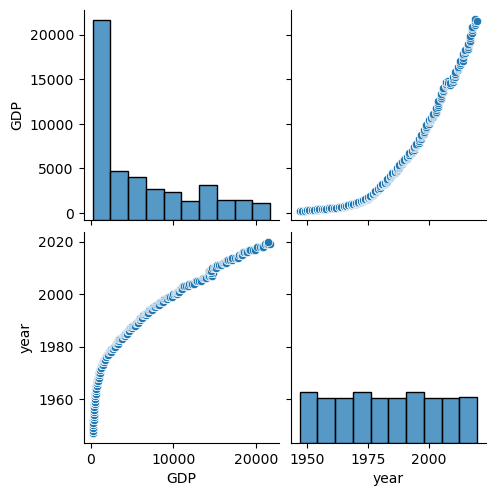

In [88]:
sns.pairplot(df)

In [89]:
# Perform unit root test on GDP data
result = sts.adfuller(gdp_data["GDP"])
print("GDP Unit Root Test:")
print("ADF Statistic: ", result[0])
print("p-value: ", result[1])

# Perform unit root test on IT data
result = sts.adfuller(it_us["GDP (current US$)"])
print("\nIT Unit Root Test:")
print("ADF Statistic: ", result[0])
print("p-value: ", result[1])

GDP Unit Root Test:
ADF Statistic:  0.005331035268484981
p-value:  0.9589707447258035

IT Unit Root Test:
ADF Statistic:  1.340875321780045
p-value:  0.9968282747181577


In [90]:
gdp_data = gdp_data.rename(columns={'year': 'Year'})

# Merge the two data sets on the 'Year' column
merged_data = pd.merge(gdp_data, it_us, on='Year')
merged_data = merged_data.dropna(subset=['GDP'])

print(merged_data)


    Year          GDP  GDP (current US$)
0   1960    542.38225       5.433000e+11
1   1961    562.20975       5.633000e+11
2   1962    603.92150       6.051000e+11
3   1963    637.45150       6.386000e+11
4   1964    684.46150       6.858000e+11
..   ...          ...                ...
56  2016  18715.04050       1.869510e+13
57  2017  19519.42350       1.947730e+13
58  2018  20580.22300       2.053310e+13
59  2019  21427.68950       2.138100e+13
60  2020  21539.68900       2.106050e+13

[61 rows x 3 columns]


In [91]:
merged_data['GDP'] = merged_data['GDP'] / merged_data['GDP'].max()
merged_data['GDP (current US$)'] = merged_data['GDP (current US$)'] / merged_data['GDP (current US$)'].max()

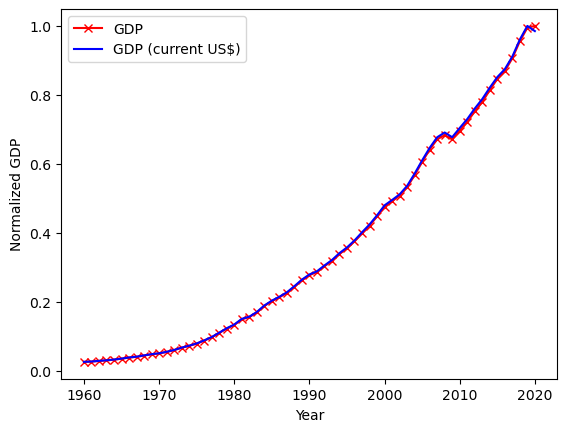

In [92]:
plt.plot(merged_data['Year'], merged_data['GDP'], label='GDP',c='r',marker='x')
plt.plot(merged_data['Year'], merged_data['GDP (current US$)'], label='GDP (current US$)',c='b')
plt.xlabel('Year')
plt.ylabel('Normalized GDP')
plt.legend()
plt.show()

In [93]:
corr_matrix = merged_data.corr()
print(corr_matrix)

                       Year       GDP  GDP (current US$)
Year               1.000000  0.967703           0.968214
GDP                0.967703  1.000000           0.999953
GDP (current US$)  0.968214  0.999953           1.000000


In [94]:
import statsmodels.formula.api as smf
merged_data.rename(columns={'GDP (current US$)': 'GDP_current_us'}, inplace=True)
model = smf.ols(formula='GDP ~ GDP_current_us ', data=merged_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.236e+05
Date:                Wed, 25 Jan 2023   Prob (F-statistic):          2.01e-120
Time:                        14:18:07   Log-Likelihood:                 269.56
No. Observations:                  61   AIC:                            -535.1
Df Residuals:                      59   BIC:                            -530.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0006      0.001     -1.

In [95]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    adf_test = adfuller(data)
    print("ADF Test Results:")
    print("Test Statistic: ", adf_test[0])
    print("p-value: ", adf_test[1])
    print("Critical Values:")
    for key, value in adf_test[4].items():
        print(key, ": ", value)
        
check_stationarity(merged_data['GDP_current_us'])


ADF Test Results:
Test Statistic:  -0.09536009105004278
p-value:  0.9498987297969016
Critical Values:
1% :  -3.5714715250448363
5% :  -2.922629480573571
10% :  -2.5993358475635153


In [96]:
gdp_params = merged_data['GDP']
check_stationarity(gdp_params)


ADF Test Results:
Test Statistic:  0.7599345999895569
p-value:  0.9909611223505607
Critical Values:
1% :  -3.5714715250448363
5% :  -2.922629480573571
10% :  -2.5993358475635153


performing cusum analysis

In [97]:


def cusum(x):
    s = np.cumsum(x)
    cusum = np.zeros(s.shape)
    cusum[0] = s[0]
    for i in range(1, len(s)):
        cusum[i] = s[i] - s[i-1]
    return cusum

# Example usage
x = np.random.normal(size=100)
cusum_x = cusum(x)


## plotting 

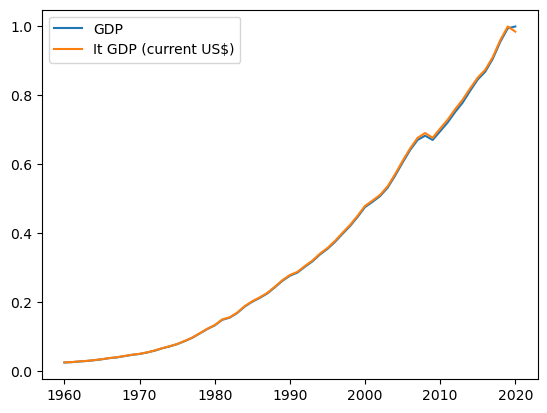

In [98]:
# Perform CUSUM analysis on 'GDP' and 'GDP (current US$)' columns
merged_data['cusum_GDP'] = cusum(merged_data['GDP'])
merged_data['cusum_GDP_current_us'] = cusum(merged_data['GDP_current_us'])

# Plot the results
import matplotlib.pyplot as plt
plt.plot(merged_data['Year'], merged_data['cusum_GDP'], label='GDP')
plt.plot(merged_data['Year'], merged_data['cusum_GDP_current_us'], label='It GDP (current US$)')
plt.legend()
plt.show()


In [103]:
from statsmodels.tsa.stattools import grangercausalitytests

granger_test = grangercausalitytests(merged_data[['GDP', 'GDP_current_us']], maxlag=2)

print(granger_test)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3526  , p=0.2497  , df_denom=57, df_num=1
ssr based chi2 test:   chi2=1.4238  , p=0.2328  , df=1
likelihood ratio test: chi2=1.4072  , p=0.2355  , df=1
parameter F test:         F=1.3526  , p=0.2497  , df_denom=57, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.8206  , p=0.0118  , df_denom=54, df_num=2
ssr based chi2 test:   chi2=10.5339 , p=0.0052  , df=2
likelihood ratio test: chi2=9.6923  , p=0.0079  , df=2
parameter F test:         F=4.8206  , p=0.0118  , df_denom=54, df_num=2
{1: ({'ssr_ftest': (1.3526247271295597, 0.2496656967983685, 57.0, 1), 'ssr_chi2test': (1.4238155022416419, 0.23277640966005694, 1), 'lrtest': (1.407184341385232, 0.23552437148582717, 1), 'params_ftest': (1.3526247271297092, 0.24966569679834344, 57.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D8426B48B0>, <statsmodels.regression.linear_model.RegressionR

In [104]:
from statsmodels.tsa.api import VAR

# Estimate VAR model
model = VAR(merged_data[['GDP', 'GDP_current_us']])
results = model.fit()

# Perform Toda-Yamamoto causality test
causality = results.test_causality('GDP', 'GDP_current_us', kind='wald')

# Print results
print(causality)


<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: GDP_current_us does not Granger-cause GDP: fail to reject at 5% significance level. Test statistic: 1.353, critical value: 3.841>, p-value: 0.245>
